# BINARY CLASSIFICATION TEST AND ANALYSIS

**Append the directory of the m_learn package to the system path**

In [1]:
from config import *
append_path('../../')

**Import necessary packages and modules**

In [2]:
import numpy as np
np.random.seed(0)
import pandas as pd
from m_learn.tree import binary_decision_tree
from m_learn.utility.data_preprocessing import mesh_data
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn import datasets
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## 1. Binary classification test

###  1.1 Create 2 clusters/classes of 2D data

**Create x values of the 2 clusters**

In [3]:
# sigma of the random distribution
sigma = 3
# size of each class
cls_size = 500
# create feature 1 and feature 2 values of the first class
x11 = np.random.normal(20, sigma, cls_size)
x21 = np.random.normal(20, sigma, cls_size)
# create feature 1 and feature 2 values of the second class
x12 = np.random.normal(45, sigma, cls_size)
x22 = np.random.normal(35, sigma, cls_size)

**Concatenate the feature 1(x1) & feature 2(x2) values of the 2 clusters**

In [4]:
x1 = np.concatenate([x11,x12])
x2 = np.concatenate([x21,x22])

**Create the labels of the 2 clusters**

In [5]:
y = [-1 for i in range(cls_size)] + [1 for i in range(cls_size)]

**Store the xy data in a pandas dataframe**

In [6]:
data = pd.DataFrame({"x1": x1, "x2": x2, "y":y})

In [7]:
data.head(5)

,x1,x2,y
0,25.292157,21.148197,-1
1,21.200472,19.897273,-1
2,22.936214,23.289041,-1
3,26.722680,19.297353,-1
4,25.602674,18.957648,-1


In [8]:
data.tail(5)

,x1,x2,y
995,48.955653,35.293252,1
996,44.282110,39.204570,1
997,44.259619,35.475302,1
998,41.761971,31.574296,1
999,44.657323,31.067089,1


###  1.2 Scatter plot of the different classes/clusters

**Extract the datapoints of the 2 classes/clusters**

In [9]:
class1 = data[data["y"] == -1]
class2 = data[data["y"] == 1]

**Scatter plot of the 2 classes/clusters**

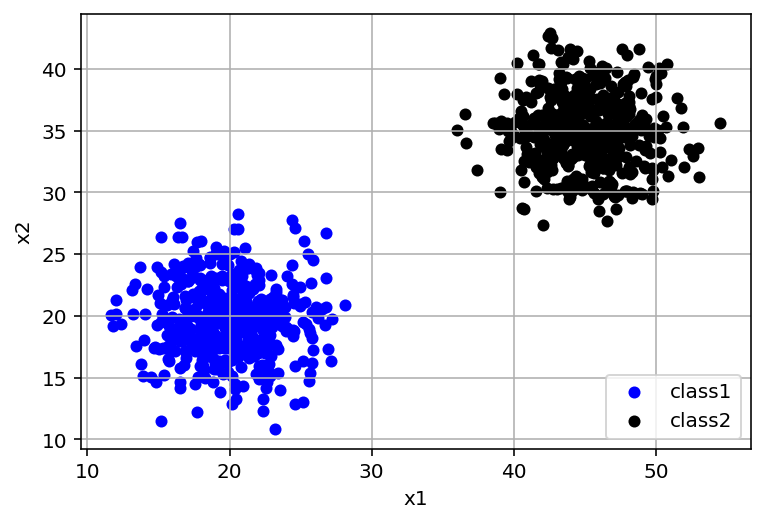

In [10]:
plt.scatter(class1["x1"], class1["x2"], c = 'b', linewidths=0.01, label = 'class1')
plt.scatter(class2["x1"], class2["x2"], c = 'k', linewidths=0.01, label = 'class2')
plt.legend(loc='lower right')
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.show()

###  1.3 Train decision tree classifier using the data

**Create and fit a binary decision tree classifier**

In [11]:
# features of the model
features = ['x1', 'x2']
# output of the model
output = 'y'
# create and train the model
model = binary_decision_tree()
model.fit(data, features, output, verbose=True)

Completed finding feature thresholds
Completed binarizing data 

Fitting decision tree
--------------------------------------------------------------------
--------------------------------------------------------------------
Subtree, depth = 0 (contains 1000 data points).
splitting feature:  x1
--------------------------------------------------------------------
Subtree, depth = 1 (contains 500 data points).
Stopping condition 1 is reached: no mistakes in current node
--------------------------------------------------------------------
Subtree, depth = 1 (contains 500 data points).
Stopping condition 1 is reached: no mistakes in current node
--------------------------------------------------------------------
--------------------------------------------------------------------
Compeleted fitting decision tree


### 1.4 Visualize the decision boundary using mesh plot

**Create mesh points**

In [12]:
# step in mesh plot
mesh_step = 0.5
# extract the xx & yy matrices and the flattened mesh points
xx, yy, mesh_points = mesh_data(data, features, mesh_step, boudary_extension=5)

In [13]:
# compute predictions 
predictions = model.predict(mesh_points)
# reshape predictions so that it fits the meshplot
predictions = predictions.reshape(xx.shape)

**Mesh plot**

<ipython-input-14-3f35772406e9>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, predictions, cmap=plt.cm.Paired)


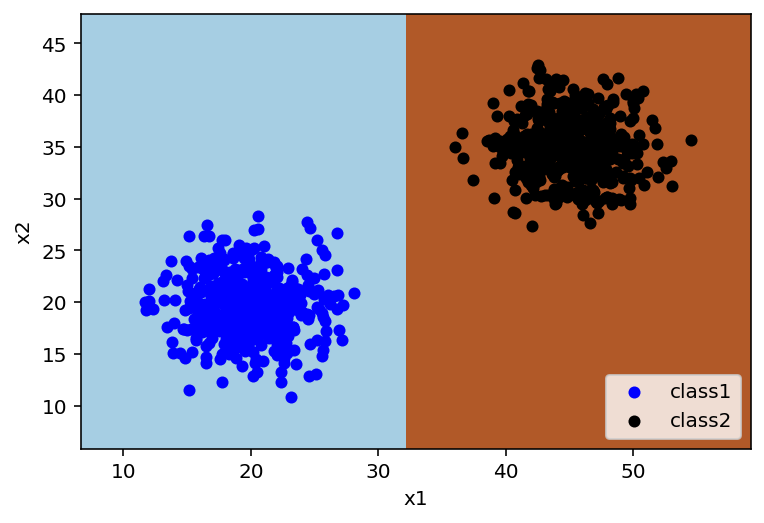

In [14]:
plt.pcolormesh(xx, yy, predictions, cmap=plt.cm.Paired)
plt.scatter(class1["x1"], class1["x2"], c = 'b', linewidths=0.01, label = 'class1')
plt.scatter(class2["x1"], class2["x2"], c = 'k', linewidths=0.01, label = 'class2')
plt.legend(loc='lower right')
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

## 2. Binary classification using cancer data

### 2.1 Load and preprocess cancer data

**Load the cancer data**

In [15]:
cancer_data = datasets.load_breast_cancer()

**Features and output of the model**

In [16]:
features = cancer_data.feature_names.tolist()
output = 'labels'

**Store the data in a pandas dataframe and shuffle the data**

In [17]:
# store the feature columns in a pandas dataframe
data = pd.DataFrame(cancer_data.data, columns=features)
# store the output column in the pandas dataframe
data[output] = cancer_data.target
# shuffle the data
data = data.sample(frac=1, random_state=0).reset_index(drop=True)
data.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,labels
0,13.400,20.52,88.64,556.7,0.11060,0.14690,0.14450,0.08172,0.2116,0.07325,...,29.66,113.30,844.4,0.15740,0.38560,0.51060,0.20510,0.3585,0.11090,0
1,13.210,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,0.05584,...,34.23,91.29,632.9,0.12890,0.10630,0.13900,0.06005,0.2444,0.06788,1
2,14.020,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.02652,0.1589,0.05586,...,19.31,96.53,688.9,0.10340,0.10170,0.06260,0.08216,0.2136,0.06710,1
3,14.260,18.17,91.22,633.1,0.06576,0.05220,0.02475,0.01374,0.1635,0.05586,...,25.26,105.80,819.7,0.09445,0.21670,0.15650,0.07530,0.2636,0.07676,1
4,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,1
5,11.340,18.61,72.76,391.2,0.10490,0.08499,0.04302,0.02594,0.1927,0.06211,...,23.03,79.15,478.6,0.14830,0.15740,0.16240,0.08542,0.3060,0.06783,1
6,12.050,22.72,78.75,447.8,0.06935,0.10730,0.07943,0.02978,0.1203,0.06659,...,28.71,87.36,488.4,0.08799,0.32140,0.29120,0.10920,0.2191,0.09349,1
7,11.700,19.11,74.33,418.7,0.08814,0.05253,0.01583,0.01148,0.1936,0.06128,...,26.55,80.92,483.1,0.12230,0.10870,0.07915,0.05741,0.3487,0.06958,1
8,7.729,25.49,47.98,178.8,0.08098,0.04878,0.00000,0.00000,0.1870,0.07285,...,30.92,57.17,248.0,0.12560,0.08340,0.00000,0.00000,0.3058,0.09938,1
9,10.260,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,0.1633,0.07005,...,19.48,70.89,357.1,0.13600,0.16360,0.07162,0.04074,0.2434,0.08488,1


**Change the binary labels from {0,1} to {-1,1}**

In [18]:
data[output] = data[output].apply(lambda x: 1 if x == 1 else -1)
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,labels
0,13.40,20.52,88.64,556.7,0.11060,0.14690,0.14450,0.08172,0.2116,0.07325,...,29.66,113.30,844.4,0.15740,0.38560,0.51060,0.20510,0.3585,0.11090,-1
1,13.21,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,0.05584,...,34.23,91.29,632.9,0.12890,0.10630,0.13900,0.06005,0.2444,0.06788,1
2,14.02,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.02652,0.1589,0.05586,...,19.31,96.53,688.9,0.10340,0.10170,0.06260,0.08216,0.2136,0.06710,1
3,14.26,18.17,91.22,633.1,0.06576,0.05220,0.02475,0.01374,0.1635,0.05586,...,25.26,105.80,819.7,0.09445,0.21670,0.15650,0.07530,0.2636,0.07676,1
4,13.03,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,1


**Train test split the data**

In [19]:
train_data, test_data = train_test_split(data, test_size  = 0.25, random_state = 0)

### 2.2 Create and fit a binary decision tree classifier and access the performance of the classifier

**Parameters of the model**

In [20]:
max_depth = 5
min_samples_split = 8
min_impurity_decrease = 0

**Create and fit the model**

In [21]:
cancer_model = binary_decision_tree(max_depth = max_depth, min_samples_split = min_samples_split, 
                                    min_impurity_decrease=min_impurity_decrease)
cancer_model.fit(train_data, features, output, verbose=True)

Completed finding feature thresholds
Completed binarizing data 

Fitting decision tree
--------------------------------------------------------------------
--------------------------------------------------------------------
Subtree, depth = 0 (contains 426 data points).
splitting feature:  mean concave points
--------------------------------------------------------------------
Subtree, depth = 1 (contains 255 data points).
splitting feature:  worst area
--------------------------------------------------------------------
Subtree, depth = 2 (contains 239 data points).
splitting feature:  mean area
--------------------------------------------------------------------
Subtree, depth = 3 (contains 237 data points).
splitting feature:  mean concavity
--------------------------------------------------------------------
Subtree, depth = 4 (contains 220 data points).
splitting feature:  mean texture
--------------------------------------------------------------------
Subtree, depth = 5 (contai

**Number of nodes in the DT**

In [22]:
print("Number of nodes in the decision tree:",cancer_model.nodes)

Number of nodes in the decision tree: 27


**Print performance metrics of the classifier**

In [23]:
predictions = cancer_model.predict(test_data)
print("accuracy:",accuracy_score(test_data[output], predictions))
print("precision:",precision_score(test_data[output], predictions))
print("recall:",recall_score(test_data[output], predictions))

accuracy: 0.958041958041958
precision: 0.9494949494949495
recall: 0.9894736842105263
